In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

from tensorflow.keras import datasets


#### 데이터 다운로드
- 영화 리뷰를 분류하는 문제
- 긍정적인지 부정적인지 

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=1000)

In [3]:
# 원핫인코딩

def OneHot_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, index in enumerate(sequences):
        results[i, index] = 1. 
    return results
    

In [4]:
train_data = OneHot_sequences(train_data)
test_data = OneHot_sequences(test_data)

In [5]:
print(train_data.shape)
print(test_data.shape)

(25000, 1000)
(25000, 1000)


### 신경망 모델링

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000, )))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
def plot_history(model):
    history = model.fit(train_data, train_labels, epochs=20, batch_size=512,
                        validation_data=(test_data, test_labels), verbose=2)

    loss = history.history['loss']  # 훈련데이터 손실값
    val_loss = history.history['val_loss']  # 검증데이터 손실값

    acc = history.history['accuracy']  # 정확도
    epochs = range(1, len(acc) + 1)

    # 손실값을 그래프로 출력 => 검증 세트의 손실값이 증가하는 경향 확인(과대적합)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['train_error', 'val_error'], loc='upper left')
    plt.title("Loss Plot", color='white')
    plt.xlabel("epochs", color='white')
    plt.ylabel("loss value", color='white')

    plt.show()


Epoch 1/20
49/49 - 1s - loss: 0.5800 - accuracy: 0.7067 - val_loss: 0.4350 - val_accuracy: 0.8214 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.3707 - accuracy: 0.8480 - val_loss: 0.3446 - val_accuracy: 0.8550 - 210ms/epoch - 4ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3234 - accuracy: 0.8658 - val_loss: 0.3310 - val_accuracy: 0.8608 - 215ms/epoch - 4ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3082 - accuracy: 0.8734 - val_loss: 0.3303 - val_accuracy: 0.8597 - 211ms/epoch - 4ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3027 - accuracy: 0.8756 - val_loss: 0.3279 - val_accuracy: 0.8613 - 218ms/epoch - 4ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2974 - accuracy: 0.8770 - val_loss: 0.3323 - val_accuracy: 0.8590 - 217ms/epoch - 4ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2917 - accuracy: 0.8802 - val_loss: 0.3293 - val_accuracy: 0.8599 - 217ms/epoch - 4ms/step
Epoch 8/20
49/49 - 0s - loss: 0.2867 - accuracy: 0.8826 - val_loss: 0.3331 - val_accuracy: 0.8589 - 217ms/epoch - 4ms/step
Epoch 9/20
49/49 -

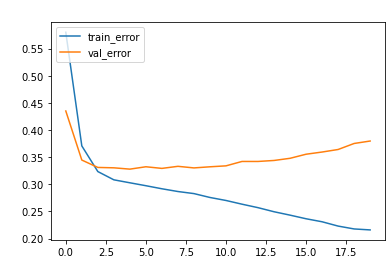

In [8]:
plot_history(model)

### 과대적합 방지
- 조기종료 기법
- 가중치 규제 

In [9]:
model_regulized = tf.keras.Sequential()
model_regulized.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                activation='relu', input_shape=(1000, )))
model_regulized.add(tf.keras.layers.Dense(16,  kernel_regularizer=tf.keras.regularizers.l2(0.001),
                                activation='relu'))
model_regulized.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 출력층

model_regulized.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])


Epoch 1/20
49/49 - 1s - loss: 0.6286 - accuracy: 0.7010 - val_loss: 0.4831 - val_accuracy: 0.8174 - 587ms/epoch - 12ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4167 - accuracy: 0.8468 - val_loss: 0.3924 - val_accuracy: 0.8534 - 227ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3659 - accuracy: 0.8666 - val_loss: 0.3715 - val_accuracy: 0.8596 - 229ms/epoch - 5ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3496 - accuracy: 0.8704 - val_loss: 0.3652 - val_accuracy: 0.8607 - 233ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3410 - accuracy: 0.8738 - val_loss: 0.3640 - val_accuracy: 0.8607 - 231ms/epoch - 5ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3377 - accuracy: 0.8745 - val_loss: 0.3614 - val_accuracy: 0.8605 - 232ms/epoch - 5ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3330 - accuracy: 0.8774 - val_loss: 0.3597 - val_accuracy: 0.8598 - 230ms/epoch - 5ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3308 - accuracy: 0.8762 - val_loss: 0.3599 - val_accuracy: 0.8590 - 235ms/epoch - 5ms/step
Epoch 9/20
49/4

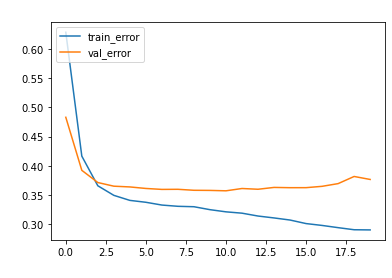

In [10]:
plot_history(model_regulized)  # 위의 모델보다는 규제를 적용했을 때 과잉적합이 덜 됨 

### 드롭아웃
- 학습과정에서 노드 일부분을 랜덤하게 제거 

In [15]:
model_dropout = tf.keras.Sequential()
model_dropout.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000, )))
model_dropout.add(tf.keras.layers.Dropout(0.5))  # 드롭아웃 비율
model_dropout.add(tf.keras.layers.Dense(16, activation='relu'))
model_dropout.add(tf.keras.layers.Dropout(0.5))
model_dropout.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/20
49/49 - 1s - loss: 0.6758 - accuracy: 0.5698 - val_loss: 0.6049 - val_accuracy: 0.7665 - 622ms/epoch - 13ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5803 - accuracy: 0.6995 - val_loss: 0.4717 - val_accuracy: 0.8274 - 235ms/epoch - 5ms/step
Epoch 3/20
49/49 - 0s - loss: 0.4935 - accuracy: 0.7819 - val_loss: 0.3934 - val_accuracy: 0.8469 - 239ms/epoch - 5ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4384 - accuracy: 0.8189 - val_loss: 0.3580 - val_accuracy: 0.8532 - 235ms/epoch - 5ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4074 - accuracy: 0.8339 - val_loss: 0.3415 - val_accuracy: 0.8576 - 236ms/epoch - 5ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3827 - accuracy: 0.8460 - val_loss: 0.3276 - val_accuracy: 0.8596 - 237ms/epoch - 5ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3682 - accuracy: 0.8547 - val_loss: 0.3245 - val_accuracy: 0.8601 - 241ms/epoch - 5ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3577 - accuracy: 0.8582 - val_loss: 0.3213 - val_accuracy: 0.8605 - 240ms/epoch - 5ms/step
Epoch 9/20
49/4

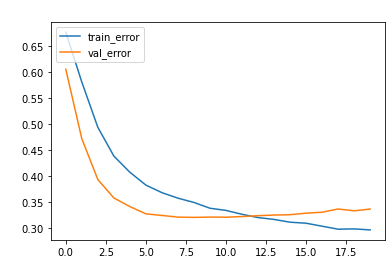

In [16]:
plot_history(model_dropout)

### MNIST 필기체 숫자 인식 예제 

In [18]:
## 데이터 로드 

mnist = datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

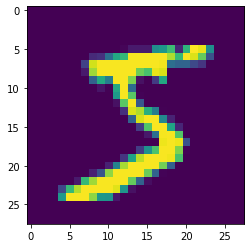

In [23]:
plt.imshow(X_train[0])

In [26]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [62]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # 0~9 예측


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [63]:
model.fit(X_train, y_train, epochs=10,  batch_size=64)
print(f"(loss, acc) : {model.evaluate(X_test, y_test, verbose=2)} ")

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 1.1059 - accuracy: 0.7215
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4486 - accuracy: 0.8788
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3613 - accuracy: 0.8974
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3242 - accuracy: 0.9069
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3000 - accuracy: 0.9132
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2798 - accuracy: 0.9192
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2617 - accuracy: 0.9241
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2464 - accuracy: 0.9277
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2301 - accuracy: 0.9337
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2163 - accuracy: 0.9378

### 패션 아이템 분류
- 패션 mnist 데이터셋 

In [35]:
from tensorflow.keras import datasets, layers, models 

In [36]:
# 이미지는 28*28 크기, 픽셀 값은 0~255 사이, 레이블 0~9

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


9


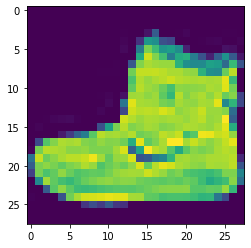

In [37]:
plt.imshow(train_images[0])
print(train_labels[0]) 

In [54]:
train_images = train_images/255.0
test_images = test_images/255.0


In [56]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)
print(f"(loss, acc) : {model.evaluate(test_images, test_labels)} ")


Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5176 - accuracy: 0.8210
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3874 - accuracy: 0.8630
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3446 - accuracy: 0.8756
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3206 - accuracy: 0.8850
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3024 - accuracy: 0.8899
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2868 - accuracy: 0.8953
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2735 - accuracy: 0.8995
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2642 - accuracy: 0.9024
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2528 - accuracy: 0.9078
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8793